Reading [MNIST](https://github.com/HosseinZaredar/Computational-Intelligence/blob/main/read_MNIST.py) dataset:

In [54]:
import numpy as np

base_path = '/content/drive/MyDrive/AI/'
# Reading The Train Set
train_images_file = open(base_path + 'train-images.idx3-ubyte', 'rb')
train_images_file.seek(4)
num_of_train_images = int.from_bytes(train_images_file.read(4), 'big')
train_images_file.seek(16)

train_labels_file = open(base_path + 'train-labels.idx1-ubyte', 'rb')
train_labels_file.seek(8)

train_set = []
for n in range(num_of_train_images):
    image = np.zeros((784, 1))
    for i in range(784):
        image[i, 0] = int.from_bytes(train_images_file.read(1), 'big') / 256
    
    label_value = int.from_bytes(train_labels_file.read(1), 'big')
    label = np.zeros((10, 1))
    label[label_value, 0] = 1
    
    train_set.append((image, label))


# Reading The Test Set
test_images_file = open(base_path + 't10k-images.idx3-ubyte', 'rb')
test_images_file.seek(4)

test_labels_file = open(base_path + 't10k-labels.idx1-ubyte', 'rb')
test_labels_file.seek(8)

num_of_test_images = int.from_bytes(test_images_file.read(4), 'big')
test_images_file.seek(16)

test_set = []
for n in range(num_of_test_images):
    image = np.zeros((784, 1))
    for i in range(784):
        image[i] = int.from_bytes(test_images_file.read(1), 'big') / 256
    
    label_value = int.from_bytes(test_labels_file.read(1), 'big')
    label = np.zeros((10, 1))
    label[label_value, 0] = 1
    
    test_set.append((image, label))


Function to show images:

In [55]:
import matplotlib.pyplot as plt

# A function to plot images
def show_image(img):
    image = img.reshape((28, 28))
    plt.imshow(image, 'gray')


Testing the read data:

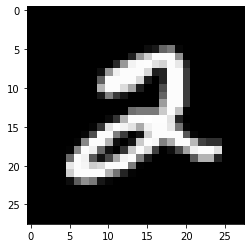

2


In [97]:
# Plotting an image
show_image(train_set[5][0])
plt.show()

def get_number(train_set, index):
  sum = 0
  for c in train_set[index][1]:
      if c == 0:
          sum += 1
      else:
          break
  return sum

print(get_number(train_set, 5))

Neural Network's structure:
- 28*28 = 784 neurons for first layer
- Hidden layers: 2nd & 3rd layer -> 16 neurons
- Last layer: output -> 10 neurons
  
![Image]("https://drive.google.com/file/d/1TDPRy4K2TKTzwZllWMd1cFP8934T0HnZ/view?usp=sharing")
  
Initialize wieght matrixes and bias arrays:

In [ ]:
layerNeurons = [784, 16, 16, 10]

def init():
    center = 0
    margin = 1
    w21Mat = np.random.normal(center, margin, size = (layerNeurons[1], layerNeurons[0]))
    b1 = np.zeros((layerNeurons[1],1))

    w32Mat = np.random.normal(center, margin, size = (layerNeurons[2], layerNeurons[1]))
    b2 = np.zeros((layerNeurons[2],1))

    w43Mat = np.random.normal(center, margin, size = (layerNeurons[3], layerNeurons[2]))
    b3 = np.zeros((layerNeurons[3],1))
    return w21Mat, w32Mat, w43Mat, b1, b2, b3

In [56]:

def sigmoid(x):
  
    z = np.exp(-x)
    sig = 1 / (1 + z)

    return sig

In [98]:
def result(o):
  max_index = 0
  max_num = 0
  for i in range(len(o)):
    if o[i] > max_num:
      max_num = o[i]
      max_index = i
  return max_index

def calculate_accuracy(train_set, output):
  counter = 0
  for i in range(100):
    if output[i] == get_number(train_set, i):
      counter+=1
  return counter/100


Calculate result for first 100 images

In [109]:
w21Mat, w32Mat, w43Mat, b1, b2, b3 = init()
output = []
for i in range(100):
  a1 = sigmoid((w21Mat @ train_set[i][0]) + b1)
  a2 = sigmoid((w32Mat @ a1) + b2)
  a3 = sigmoid((w43Mat @ a2) + b3)
  output.append(result(a3))

print('Accuracy: ' + str(calculate_accuracy(train_set, output)))
  

Accuracy: 0.11
